In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from analysis_functions import dt_from_measurement_dir, gaussian_from, gaussian

In [27]:
plt.style.use('ggplot')

In [28]:
base_dir = 'Breakdown_Measurements'
sub_dirs = os.listdir(base_dir)
sub_dirs

['G0.05mm_V2310V_7_28', 'G0.05mm_V770V_7_28', 'G0.05mm_V1540V_7_28']

In [29]:
!rm Breakdown_Measurements/.DS_Store

rm: Breakdown_Measurements/.DS_Store: No such file or directory


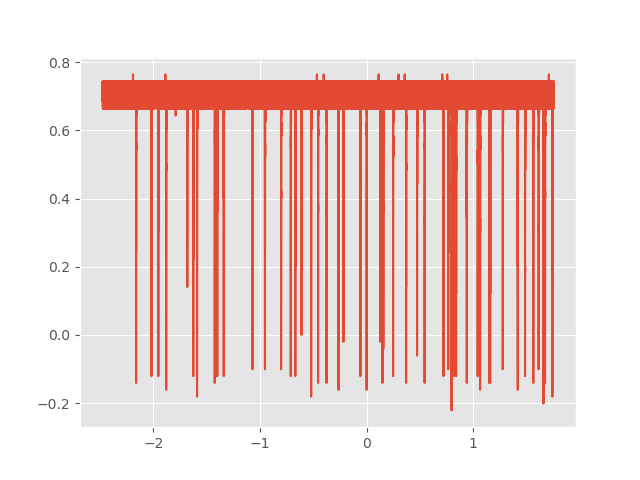

In [30]:
data = np.load(os.path.join(os.path.join(base_dir,sub_dirs[1]), 'trial_2.npy'))
plt.figure()
plt.plot(data[0],data[1])

In [31]:
v770 = dt_from_measurement_dir(os.path.join(base_dir, sub_dirs[1]),threshold=-0.3) * 1e6
v1540 = dt_from_measurement_dir(os.path.join(base_dir, sub_dirs[1]),threshold=-0.3) * 1e6
v2310 = dt_from_measurement_dir(os.path.join(base_dir, sub_dirs[1]),threshold=-0.3) * 1e6

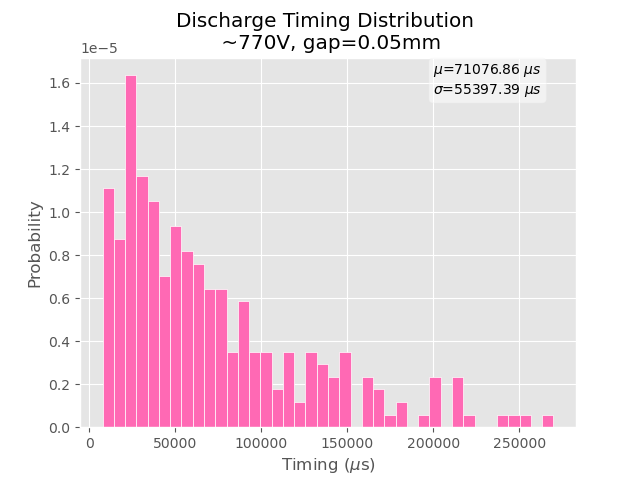

In [43]:
plt.figure()
mean = v770.mean()
std = v770.std()
text = '\n'.join((
    r'$\mu$=' + f'{round(mean,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std,2)} ' + r'$\mu s$'))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(200000, 1.55e-5, text,bbox=props)


plt.hist(v770,bins=40,density=True,color='hotpink',edgecolor='white')
plt.ylabel('Probability')
plt.xlabel(r'Timing ($\mu$s)')
plt.title('Discharge Timing Distribution \n ~770V, gap=0.05mm')
plt.savefig('No_LED_Near_Breakdown.png')